# Batalimo-Maluba-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale](#Technologische-Merkmale)
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
        * [G7a](#G7a)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)
* [Appendix](#Appendix)
    * [Batalimo - de Bayle des Hermens 1975](#Batalimo---de-Bayle-des-Hermens-1975)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats.mstats as mstats
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'BTM'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [23]:
sql = """SELECT
           t_Ort.ort_kurz,
           [t_Ort].[ort_name] || ' (Fpl. ' || [Kat-Nr] || ')' AS name,
           t_komplex.bef_art,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Gewicht,
           t_Obj.Form_Gef,
           t_Obj.Anzahl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE ((t_Obj.Typ) Like '%"""+style+"""%')""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = pd.to_numeric(df['Anzahl'])
df['Gewicht'] = pd.to_numeric(df['Gewicht'])
df.pivot_table(values = 'Anzahl', index = 'Typ', aggfunc = sum, margins = True)  # Anzahl GE

Typ
BTM              178.0
BTM (?)           45.0
BTM / NGB (?)      1.0
NGB/BTM (?)        2.0
All              226.0
Name: Anzahl, dtype: float64

In [24]:
df['Gewicht'].sum()/1000

13.107

In [25]:
df.loc[df['Anzahl'] != 1]

,ort_kurz,name,bef_art,objID,Typ,Gewicht,Form_Gef,Anzahl,Fabric
187,MKL,Mokelo (Fpl. 213),Oberfl,5638,BTM (?),183,None,15,5a
194,NZA,Nzambi (Fpl. 205),Oberfl,5938,BTM,44,B1 (?),2,4b
195,NZA,Nzambi (Fpl. 205),Oberfl,5939,BTM,121,B1 (?),5,5b/4b (?)


Von wie vielen Fundstellen stammen die sicheren Stücke?

In [26]:
# nur sichere Stücke herausfiltern - keine () im Typ-Ausdruck
a = df.loc[~df['Typ'].str.contains(' ()')]
a['name'].value_counts()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


Maluba (Fpl. 230)          127
Dongo (Fpl. 202)            24
Nzambi (Fpl. 205)            9
Mokelo (Fpl. 213)            5
Bomboko (Fpl. 210)           2
Ngbanja (Fpl. 199)           2
Maoko (Fpl. 207)             2
Mbati-Ngombe (Fpl. 204)      1
Libenge (Fpl. 208)           1
Name: name, dtype: int64

In [27]:
df.pivot_table(values = 'Anzahl', index = ['bef_art', 'ort_kurz'], aggfunc = sum, margins = True)

bef_art  ort_kurz 
Grab     MLB            4.0
Grube    MLB          140.0
Oberfl   BMK            4.0
         DON           28.0
         EBE            1.0
         LIB            1.0
         MAO            3.0
         MBN            2.0
         MKL           20.0
         MLB            2.0
         MND            1.0
         MTB            2.0
         NGB            3.0
         NZA           14.0
         UBA 415,5      1.0
All                   226.0
Name: Anzahl, dtype: float64

In [28]:
a = df.pivot_table(values = 'Anzahl', index = 'bef_art', aggfunc = sum)
a = pd.DataFrame(a)
a['Prozent'] = a['Anzahl']/a['Anzahl'].sum()*100
a

,Anzahl,Prozent
bef_art,,
Grab,4,1.769912
Grube,140,61.946903
Oberfl,82,36.283186


## Technologische Merkmale

In [29]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [30]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


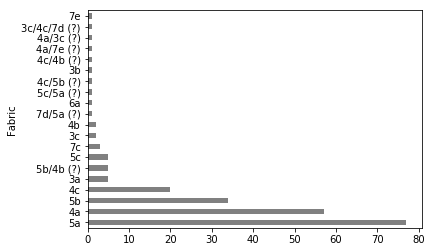

In [31]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [32]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
5a,77,35.000000
4a,57,25.909091
5b,34,15.454545
4c,20,9.090909
3a,5,2.272727


In [33]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
MagerungDichte,,
,24,10.909091
mittel,10,4.545455
sehr viel,120,54.545455
viel,66,30.000000


In [34]:
df.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)

MagerungArt
                            24
Laterit                      1
Org/Gl/Laterit               1
S                          141
S/Gl                         3
S/Laterit                   19
S/Laterit?                   1
S/Org                        2
S/kl schwarze Partikel       1
S/rote Partikel             24
S/rote partikel              1
S/schwarze Partikel          1
kl schwarze Partikel/S?      1
Name: Anzahl, dtype: int64

### Brennfarbe

In [35]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,99,46.919431
Sonstig,92,43.601896
Weiß,20,9.478673


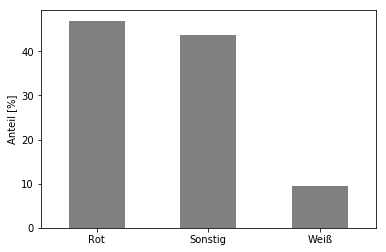

In [36]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [37]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

g        172
bg       114
s         93
br        77
          18
bg bg     14
g g        9
bg g       9
br g       8
bg s       7
dtype: int64

### Oberfläche der Scherben

in dieser Betrachtung keine fraglischen Stücke, sondern nur sicher NGB-Gruppe:

In [38]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_name,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) = '"""+style+"""'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [39]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot.sort_values('Prozent', ascending = False)

,Anzahl,Prozent
Obfl,,
rau,52,31.325301
leicht rau,49,29.518072
glatt,48,28.915663
glatt/leicht rau,9,5.421687
außen rau/innen glatt,3,1.807229
außen glatt/innen rau,2,1.204819
gleicht rau,1,0.602410
leicht rau/rau,1,0.602410
sehr rau,1,0.602410


### Wandung

In [40]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


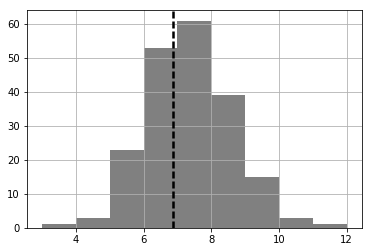

In [41]:
bins = df['Wandung'].max() - df['Wandung'].min()
mean = df['Wandung'].mean()
df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)

In [42]:
df['Wandung'].describe()

count    199.000000
mean       6.854271
std        1.300299
min        3.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       12.000000
Name: Wandung, dtype: float64

In [43]:
df['Wandung'].var()

1.6907771179127962

## Gefäßformen

In [44]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [45]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['objID'], ascending=[False])
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,objID
Form_Gef,
C2 (?),29
C2,27
E5 (?),8
B1 (?),5
E1 (?),4


In [46]:
df_pivot['objID'].sum()

89

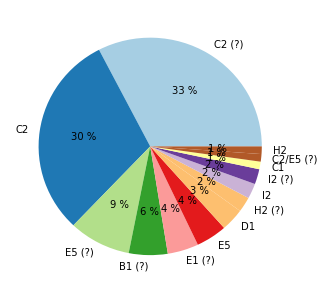

In [47]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [48]:
a = pd.Series({'sichere Bestimmung':len(df.loc[~df['Form_Gef'].str.contains("\?")].index),
               'fragliche Bestimmung':len(df.loc[df['Form_Gef'].str.contains("\?")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fragliche Bestimmung,51,57.303371
sichere Bestimmung,38,42.696629


ohne die (?):

In [49]:
# löschen der (?)
df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['objID'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


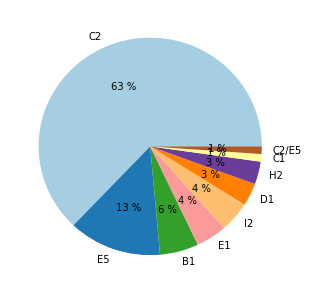

In [50]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

### C2

In [51]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Bauch,
           t_Obj.Form_Boden,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) Like '%C2%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [52]:
df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len, margins = True)

Form_Gef
C2           27.0
C2 (?)       29.0
C2/E5 (?)     1.0
All          57.0
Name: objID, dtype: float64

In [53]:
df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)

Form_Mdg
         27
M1        6
M1/M4     1
M3        3
M4       18
M5        1
Name: objID, dtype: int64

In [54]:
df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)

Form_Rand
A2           2
B1           6
B1.1        17
B1.1 (?)     1
B1.4         5
B2           1
Name: objID, dtype: int64

In [55]:
df.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)

Form_Hals
                                     19
A1                                    4
A1/A2                                 4
A1/A2/lang                            1
A1/A3/leicht                          1
A1/lang                               1
A1/leicht                             2
A1/mit Wulst                          1
A2                                    1
A2 (?)                                1
A2/leicht (?)                         1
B1                                    4
B2                                    9
B2 (?)                                1
B2(?)                                 1
B3/kurz                               1
C1/B1                                 1
kurz                                  1
kurzer Zylinder, innen einbiegend     1
verdickt/Leiste                       1
Name: objID, dtype: int64

In [56]:
df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)

Form_Schulter
             24
A1/A2         1
A2           26
A2 (?)        1
A2/leicht     2
B1a           2
Name: objID, dtype: int64

In [57]:
df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)

Form_Bauch
         29
A1       25
A1/A3     1
A3        1
Name: objID, dtype: int64

In [58]:
df.pivot_table(values = 'objID', index = 'Form_Boden', aggfunc = len)

Form_Boden
B4    2
Name: objID, dtype: int64

In [97]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           t_Komplex.bef_nr,
           t_Obj.Individuum,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) Like '%C2%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)
df.describe()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

,objID,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD
count,57.000000,32.000000,6.000000,49.000000,7.000000,24.000000,7.000000,2.0
mean,2407.964912,21.656250,13.333333,19.204082,10.857143,18.500000,6.071429,4.0
std,1648.812722,7.925497,3.125167,7.724365,3.350551,5.231593,2.523697,0.0
min,94.000000,11.000000,10.500000,8.000000,6.000000,13.000000,4.000000,4.0
25%,1913.000000,14.000000,11.000000,12.500000,9.000000,13.875000,4.000000,4.0
50%,2436.000000,21.250000,12.500000,18.000000,10.000000,16.500000,6.000000,4.0
75%,2531.000000,26.125000,14.750000,24.000000,13.000000,22.375000,6.750000,4.0
max,6098.000000,42.000000,18.500000,40.000000,16.000000,30.000000,11.000000,4.0


(12.475, 24.024999999999999, 10.1, 18.899999999999999)

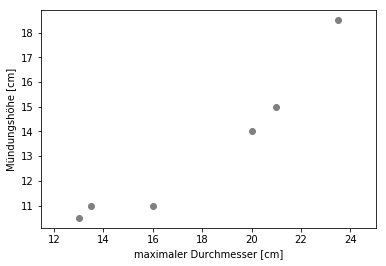

In [98]:
x = df['maxD']
y = df['muendungsH']

plt.plot(x, y, 'o', color = 'grey')
plt.xlabel("maximaler Durchmesser [cm]")
plt.ylabel("Mündungshöhe [cm]")
plt.axis('equal')

In [99]:
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['minD']

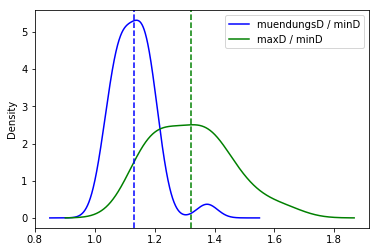

In [101]:
df2 = df['muend-min'].dropna()
df3 = df['max-min'].dropna()
mean2 = df2.mean()
mean3 = df3.mean()

df2.plot(kind = 'kde', color = 'blue', label="muendungsD / minD")
df3.plot(kind = 'kde', color = 'green', label="maxD / minD")
plt.axvline(mean2, color = 'blue', ls = 'dashed')
plt.axvline(mean3, color = 'green', ls = 'dashed')
plt.legend()

In [63]:
mean2

1.1318163734274964

In [64]:
mean3

1.3216721047270585

## Mündungs- und Randformen

In [103]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)

# Zeilen ohne Mdg löschen
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Mdg'])
df1['Form_Mdg'] = df1['Form_Mdg'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Mdg'] = df1['Form_Mdg'].apply(lambda x: x.split('/')[0])\

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [104]:
# Zeilen ohne Mdg löschen
df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M4,56,64.367816
M1,17,19.540230
M3,9,10.344828
M5,3,3.448276
M2,1,1.149425
M6,1,1.149425


In [108]:
df_pivot['objID'].sum()

98

> **Tab. #** Ngbanja-Gruppe: Mündungsformen

In [109]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Rand'])
df1['Form_Rand'] = df1['Form_Rand'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Rand'] = df1['Form_Rand'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1.1,59,60.204082
B1,14,14.285714
B1.4,7,7.142857
B2,5,5.102041
A2,3,3.061224
A4,3,3.061224
C3,3,3.061224
A2.1,1,1.020408
A2.3,1,1.020408


In [110]:
df_pivot['objID'].sum()

98

> **Tab. #** Ngbanja-Gruppe: Randformen

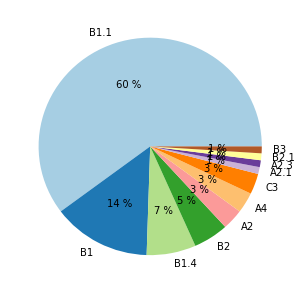

In [107]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [69]:
df_pivot['objID'].sum()   # Anzahl GE mit bestimmter Randform

98

In [70]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

19

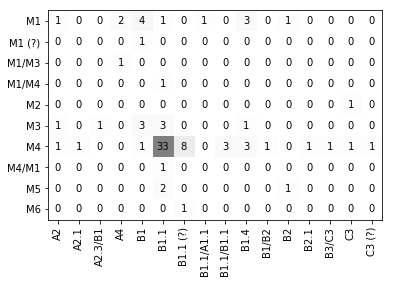

In [71]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', columns = 'Form_Rand', aggfunc = len, fill_value = 0)
#df_pivot
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

## Bodenformen

In [113]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df.pivot_table(values = 'objID', index = 'Form_Boden', aggfunc = len)

Form_Boden
B11    1
B12    1
B2     2
B4     8
B5     2
Name: objID, dtype: int64

In [114]:
len(df)

14

## Verzierungselemente

### verzierte *vs.* unverzierte Stücke

In [8]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.Anzahl,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
            [t_Obj].[Verz_PosUnbekannt] || '/' || [t_Obj].[Verz_Innen_Rand/Hals/berteil] || '/' || [t_Obj].[Ver_Rand] || '/' || [t_Obj].[Verz_Oberteil] || '/' || [t_Obj].[Verz_Hals] || '/' || [t_Obj].[Verz_Schulter] || '/' || [t_Obj].[Verz_Bauch] || '/' || [t_Obj].[Verz_Unterteil] || '/' || [t_Obj].[Verz_Bodenansatz] || '/' || [t_Obj].[Ver_Standfl] AS ObjVerz
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            LEFT JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            LEFT JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            LEFT JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Obj.Art) == 'K')
            AND ((t_Obj.Typ) Like '"""+style+"""%')
            AND ((t_Obj.Notiz) Not Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['pos'].fillna('unverz', inplace=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', columns = 'pos', aggfunc = len)

a = pd.Series({'unverziert':len(df_pivot.loc[df_pivot['unverz'] == 1]),
               'verziert':len(df_pivot.loc[df_pivot['unverz'] != 1])})
a = pd.DataFrame(a)
a = a.rename(columns={0:'Anzahl'})
a['Prozent'] = a['Anzahl']/a['Anzahl'].sum()*100
a

,Anzahl,Prozent
unverziert,15,7.317073
verziert,190,92.682927


### Häufigkeit Verz je GE

In [9]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

df_pivot.describe()

,Anzahl
count,205.000000
mean,2.834146
std,2.433791
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,18.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3E2243748>]], dtype=object)

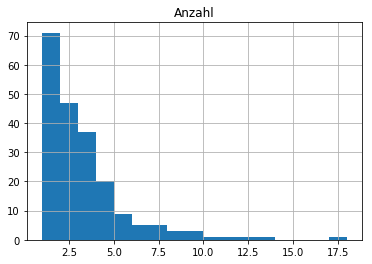

In [10]:
bins = df_pivot['Anzahl'].max() - df_pivot['Anzahl'].min()
df_pivot.hist(bins = bins)

In [11]:
mstats.gmean(df_pivot['Anzahl'])

2.1782445357259101

> geometische Mittel, da die Verteilung schief ist:

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


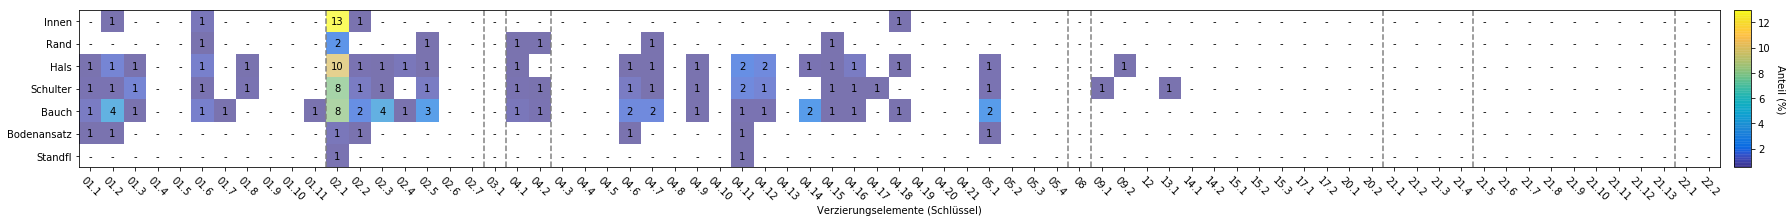

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-1-1_Batalimo-Maluba_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [79]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [80]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot_a = df_pivot.fillna('-')
#df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

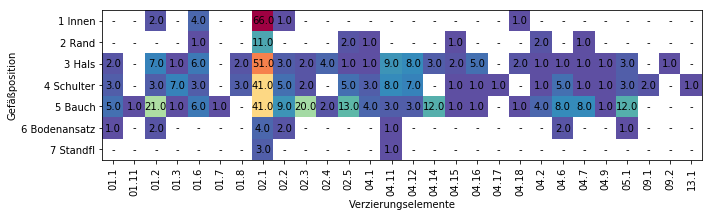

In [81]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Spectral_r')
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')

for (i, j), z in np.ndenumerate(df_pivot_a):
    plt.text(j, i, z, ha='center', va='center')

# for (i, j), z in np.ndenumerate(df_pivot_a):
#     plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')

plt.tight_layout()
plt.savefig('../output/figs/3-1-1-1_Batalimo-Maluba_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [82]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


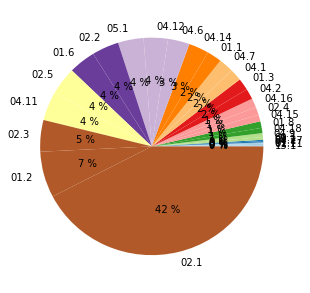

In [83]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [84]:
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,objID,Prozent
verzName,,
02.1,217,42.382812
01.2,35,6.835938
02.3,24,4.687500
04.11,22,4.296875
02.5,21,4.101562


In [85]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
pos,,
1 Innen,74,14.453125
2 Rand,19,3.710938
3 Hals,117,22.851562
4 Schulter,107,20.898438
5 Bauch,178,34.765625
6 Bodenansatz,13,2.539062
7 Standfl,4,0.781250


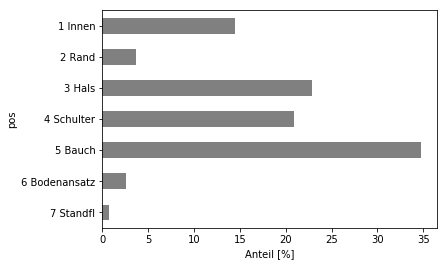

In [86]:
df_pivot = df_pivot.sort_index(ascending=False)

df_pivot.plot(y = 'Prozent', kind = 'barh', legend = None, color = 'grey')
plt.xlabel('Anteil [%]')
plt.show()

In [89]:
df_pivot.at['1 Innen','Prozent'] + df_pivot.at['3 Hals','Prozent'] + df_pivot.at['4 Schulter','Prozent'] + df_pivot.at['5 Bauch','Prozent']

92.96875

## Verbreitung

In [90]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
2,Ebeka (Fpl. 197),197,18.031148,1.429335,BTM (?)
7,Ngbanja (Fpl. 199),199,18.092242,1.665022,BTM
1,Dongo (Fpl. 202),202,18.404747,2.721870,BTM
12,"Ubangi, Fkm 415,5 (Fpl. 203)",203,18.446780,2.849030,BTM (?)
5,Mbati-Ngombe (Fpl. 204),204,18.495671,2.888154,BTM
8,Nzambi (Fpl. 205),205,18.637255,3.161920,BTM
9,Motenge-Boma (Fpl. 206),206,18.648645,3.244495,BTM (?)
4,Maoko (Fpl. 207),207,18.642191,3.407332,BTM
2,Libenge (Fpl. 208),208,18.632694,3.648189,BTM
0,Bomboko (Fpl. 210),210,18.594426,3.912055,BTM


In [91]:
df.to_csv("../data/processed/3-1-1-1_BTM_Verbreitung.csv", index = False)

## Funde am Lua != Maluba

In [92]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'Kat-Nr',
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Typ,
           t_Ort.y_lat AS Y, 
           t_Ort.x_long AS X
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Ort.ort_fluss) = 'Lua')
           AND ((t_Ort.ort_name) != 'Maluba'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# nicht bestimmte GE/Funde umbenennen
df['Typ'] = df['Typ'].replace(np.nan, '?')

df_pivot = df.pivot_table(values = 'objID', index = 'Ort', columns = 'Typ', aggfunc = len, margins = True)
df_pivot

Typ,?,DON (?),MBN,MTB,All
Ort,,,,,
Fulu-Kaba (Fpl. 233),3.0,NaN,NaN,NaN,3.0
Ilawa (Fpl. 232),9.0,2.0,2.0,1.0,14.0
Imboto (Fpl. 231),5.0,NaN,NaN,NaN,5.0
All,17.0,2.0,2.0,1.0,22.0


## Appendix

# Batalimo - de Bayle des Hermens 1975

In [93]:
df = pd.read_csv('../lit/de Bayle des Hermens 1975 - 225.csv', 
                 encoding='latin1')

df["Verz"] = df["Verzierungselement"] + ' (' + df["Schlüssel"] + ')'

df = df.sort_values(by = 'Anzahl', ascending=True)
df1 = df.sort_values(by = 'Schlüssel')
df

,Anzahl,Verzierungselement,Schlüssel,Verz
9,7,sonst. Eindruck,k.a.,sonst. Eindruck (k.a.)
8,8,dreieck. Eindruck,04.8,dreieck. Eindruck (04.8)
7,13,gerillt/gewellter Eindruck,01.5,gerillt/gewellter Eindruck (01.5)
6,14,parallele Ritzlinie,01.8,parallele Ritzlinie (01.8)
5,23,runder Eindruck,04.11,runder Eindruck (04.11)
4,34,Kammeindruck,05.1-4,Kammeindruck (05.1-4)
3,38,Doppelkreuz/Sprosse,04.18,Doppelkreuz/Sprosse (04.18)
2,70,Zickzackleiste,01.6,Zickzackleiste (01.6)
1,105,Karomuster/Raster,01.1-3,Karomuster/Raster (01.1-3)
0,131,Rillen,02.1-3,Rillen (02.1-3)


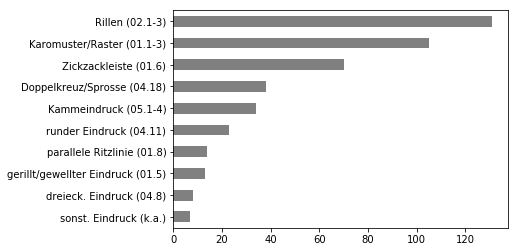

In [94]:
df.plot(x = 'Verz', y = 'Anzahl', kind = 'barh', legend = None, color = 'grey')
plt.ylabel('')
plt.savefig('../output/figs/3-1-1-1_Batalimo_VerzElemente_deBayle1975-225.pdf', bbox_inches='tight')
plt.show()

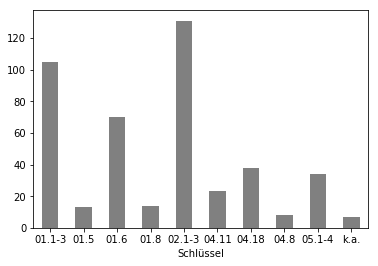

In [95]:
df1.plot(x = 'Schlüssel', y = 'Anzahl', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
#plt.xlabel('Anteil [%]')
plt.show()

## Tafeln

In [96]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,5,7,EBE,85/101,NaN,1,NGB/BTM (?),D1,B2,None
1,9,1,DON,85/102,NaN,120,BTM,I2,B2.1,B4
2,9,2,DON,85/102,NaN,87,BTM,C2,B1.1,None
3,9,3,DON,85/102,NaN,126,BTM,E5,B1.1,B4
4,9,4,DON,85/102,NaN,a,BTM,C2,B1.1,B4
5,9,5,DON,85/102,NaN,117,BTM,D1,B1.1,None
6,11,1,NZA,85/101,NaN,1,BTM,B1 (?),A4,None
7,11,2,NZA,85/101,NaN,24,BTM,E1 (?),None,None
8,13,2,MTB,85/101,NaN,22,BTM (?),H2,C3,None
9,15,1,MAO,85/101,NaN,64,BTM,C2,A2,None
